In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

/home/nakagawa/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def calc_accuracy(df):
    return (df['true_label'] == df['predict_label']).sum() / len(df)

# Prediction Import

In [3]:
LABELS = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
df = pd.read_csv('predict.csv', index_col=0)
predict = df.drop('true', axis=1)
true = df['true']
del df
true_encoded = true.map(lambda x: LABELS[x])
true_encoded.name = 'true_label'
predict.columns = LABELS
predict.head()

,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking
0,-1.856954,-0.402641,1.370710,0.664919,-1.444044,-1.103602
1,-1.075563,-0.365577,1.026769,0.431320,-0.754279,-0.619862
2,-1.512881,-0.059187,1.163938,0.451990,-1.140097,-0.957195
3,-1.696113,-0.238592,2.596291,0.839827,-1.958320,-1.072237
4,-0.740480,-0.085293,1.033653,0.294585,-0.741171,-0.924117


In [4]:
# min-max normalization
predict = predict.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
predict = predict.apply(lambda x: x / x.sum(), axis=1)

predict_label = predict.idxmax(axis=1)
predict_probability = predict.max(axis=1)
predict_probability.name = 'predict_probability'
predict_label.name = 'predict_label'
# predict.head()
# true.head()
# true_encoded.head()

In [5]:
df = pd.concat([
            predict,
            predict_probability,
            true,
            predict_label,
            true_encoded
        ], axis=1)
df.head(10)

,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking,predict_probability,true,predict_label,true_label
0,0.000000,0.173751,0.385618,0.301295,0.049331,0.090005,0.385618,5,Sitting,Walking
1,0.000000,0.139317,0.412531,0.295689,0.063044,0.089420,0.412531,2,Sitting,Sitting
2,0.000000,0.206965,0.381104,0.279743,0.053074,0.079114,0.381104,4,Sitting,Upstairs
3,0.025654,0.168258,0.445623,0.273770,0.000000,0.086694,0.445623,1,Sitting,Jogging
4,0.041908,0.191430,0.446788,0.278123,0.041751,0.000000,0.446788,3,Sitting,Standing
5,0.000000,0.162003,0.415020,0.347661,0.005672,0.069643,0.415020,5,Sitting,Walking
6,0.000000,0.178211,0.363362,0.305138,0.094727,0.058562,0.363362,0,Sitting,Downstairs
7,0.000000,0.169236,0.330632,0.294812,0.093538,0.111782,0.330632,0,Sitting,Downstairs
8,0.038208,0.151278,0.445789,0.288818,0.000000,0.075907,0.445789,1,Sitting,Jogging
9,0.000000,0.168655,0.434782,0.320531,0.022525,0.053507,0.434782,5,Sitting,Walking


Accuracy:  0.05596697826878718


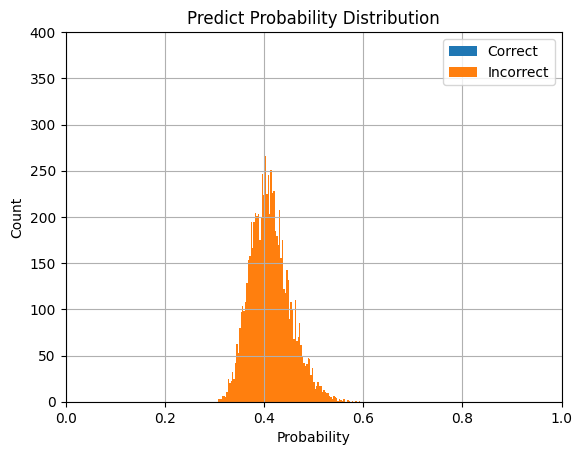

In [6]:
print('Accuracy: ', calc_accuracy(df))
# statival analysis
df.loc[df.true_label==df.predict_label, 'predict_probability'].hist(bins=100)
df.loc[df.true_label!=df.predict_label, 'predict_probability'].hist(bins=100)
plt.title('Predict Probability Distribution')
plt.xlim(0, 1)
plt.ylim(0, 400)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.legend(['Correct', 'Incorrect'])

In [7]:
df['predict_probability'].agg(['mean', 'std', 'min', 'max', 'median'])

mean      0.410399
std       0.040760
min       0.306745
max       0.593895
median    0.407552
Name: predict_probability, dtype: float64